# Language-Detection model using DecisionTree

In [3]:
#importing necessary libraries

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
#loading dataset

df = pd.read_csv("Language Detection.csv")
df.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [6]:
df["Language"].value_counts()           #value count for each language

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [7]:
#separating independent and dependant features

X = df["Text"]
Y = df["Language"]

In [8]:
le = LabelEncoder()
y = le.fit_transform(Y)

In [9]:
#preprocessed list of data

data_list = []
for text in X:
    text = re.sub('[^\w\s]',' ', text)
    text = re.sub('[0-9]', '', text)
    text = text.lower()
    data_list.append(text)

In [10]:
#bag-of-words

cv = CountVectorizer()
x = cv.fit_transform(data_list).toarray()
x.shape

(10337, 39404)

In [11]:
#train-test-splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [12]:
#model training

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
#prediction

y_prediction = model.predict(x_test) 

In [14]:
#evaluating model

ac = accuracy_score(y_test, y_prediction)
cm = confusion_matrix(y_test, y_prediction)

In [15]:
ac

0.8820116054158608

In [16]:
model.score(x_test, y_test)

0.8820116054158608

In [17]:
tname = np.array(df["Language"])
tname = np.unique(tname)
print(classification_report(y_test, y_prediction, target_names = tname))

              precision    recall  f1-score   support

      Arabic       1.00      0.90      0.95       126
      Danish       0.89      0.82      0.85        82
       Dutch       0.92      0.82      0.87       104
     English       0.94      0.94      0.94       272
      French       0.95      0.86      0.90       214
      German       0.95      0.89      0.92        80
       Greek       1.00      0.91      0.95        68
       Hindi       1.00      0.75      0.86        16
     Italian       0.93      0.85      0.89       133
     Kannada       0.39      1.00      0.56        84
   Malayalam       1.00      0.94      0.97       114
  Portugeese       0.93      0.86      0.89       146
     Russian       1.00      0.85      0.92       133
     Spanish       0.78      0.90      0.84       159
    Sweedish       0.95      0.88      0.91       152
       Tamil       1.00      0.91      0.96        94
     Turkish       0.99      0.76      0.86        91

    accuracy              

<AxesSubplot:>

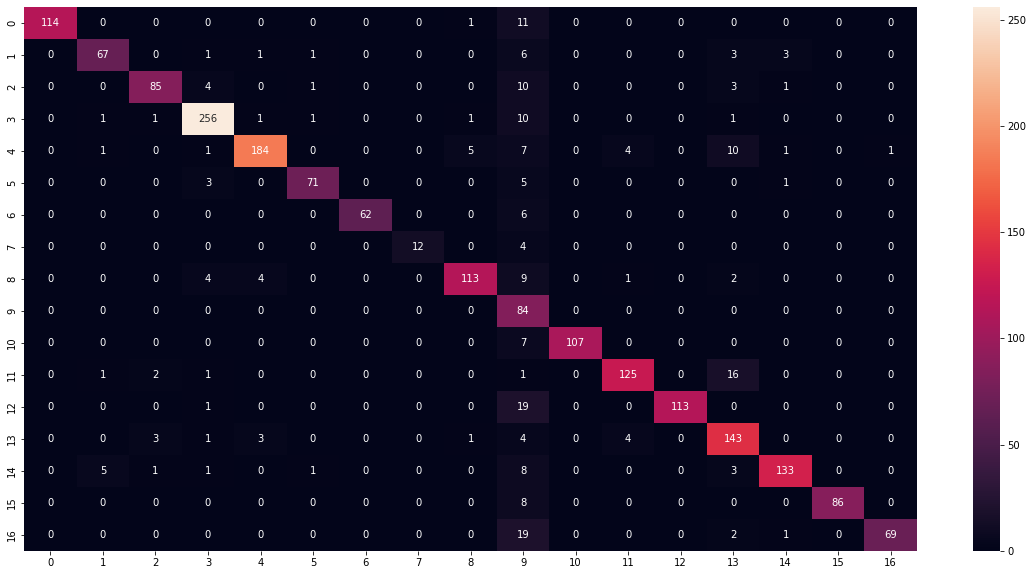

In [18]:
#plotting confusion-matrix

plt.figure(figsize = (20,10))
sns.heatmap(cm, annot = True, fmt = "d")

In [19]:
#function for language prediction

def predict_language(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print(lang)

In [20]:
#result

predict_language("This is my first NLP project.")         #English

['English']


In [21]:
predict_language("Este é meu primeiro projeto de PNL.")    #Portuguese

['Spanish']


In [22]:
predict_language("Это мой первый проект НЛП.")        #Russian

['Russian']


In [23]:
predict_language("C'est mon premier projet PNL.")      #French

['French']


In [24]:
predict_language("ഇത് എന്റെ ആദ്യത്തെ NLP പ്രോജക്ടാണ്.")    #Malayalam

['Malayalam']


using adaboost and gradientboost

In [25]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [26]:
adaboost_model = AdaBoostClassifier(n_estimators = 100)
adaboost_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [27]:
y_pred = adaboost_model.predict(x_test)

In [28]:
adaboost_ac = accuracy_score(y_test, y_pred)

In [29]:
adaboost_ac

0.5667311411992263

In [30]:
gboost_model = GradientBoostingClassifier(n_estimators = 100)

In [31]:
gboost_model.fit(x_train, y_train)
y_pred = gboost_model.predict(x_test)

In [32]:
gboost_ac = accuracy_score(y_test, y_pred)

In [33]:
gboost_ac

0.9081237911025145